<a href="https://colab.research.google.com/github/nickgithubaccaunt/computermathematicssystemsroganov/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%A4%D0%BE%D1%80%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Формирование электронных таблиц. Многопоточная и многопроцессорная оптимизация. Работа с генераторами

# Теоретическая часть

## 1. Генераторы в Python

**Генератор данных** - это специальный вид функции в Python, который позволяет создавать последовательность значений по мере необходимости. Вместо того чтобы сразу генерировать и хранить все значения, генератор создает их по одному по требованию.


1. **Создание генератора:**
    - Генератор создается с использованием ключевого слова `yield` внутри функции.
    - Вместо `return`, генератор использует `yield` для возврата значения и приостановки выполнения функции.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()
        ```

2. **Ленивая загрузка:**
    - Генераторы работают с ленивой загрузкой (lazy evaluation).
    - Они не создают все значения сразу, а только по мере запроса.
    - Это полезно для обработки больших объемов данных, когда нельзя или не нужно хранить все значения в памяти.

3. **Итерация по генератору:**
    - Генераторы можно использовать в циклах `for`.
    - Каждый вызов `yield` возвращает следующее значение из генератора.
    - Пример:
        ```python
        for value in gen:
            print(value)
        ```

4. **Состояние генератора:**
    - Генераторы сохраняют свое состояние между вызовами.
    - После каждого `yield` выполнение функции приостанавливается, а состояние сохраняется.
    - При следующем вызове генератор продолжает выполнение с того места, где остановился.

5. **Применение генераторов:**
    - Генераторы полезны для обработки больших файлов, потоковых данных, бесконечных последовательностей и других сценариев, где требуется эффективная загрузка данных.

### 1.1. **Функция `next()`**

1. **Функция `next()`**:
    - `next()` - это встроенная функция Python, которая используется для получения следующего значения из итератора (включая генераторы).
    - Когда вызывается `next()`, итератор продвигается к следующему элементу и возвращает его.
    - Если больше элементов нет, вызывается исключение `StopIteration`.

2. **Использование в генераторах**:
    - В примерах, которые я предоставил ранее, мы использовали `next()` для получения следующей порции данных из генератора.
    - В генераторах `next()` используется для получения следующего значения, которое было создано с помощью `yield`.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()

        print(next(gen))  # Выведет 1
        print(next(gen))  # Выведет 2
        print(next(gen))  # Выведет 3
        ```

3. **Обработка исключения `StopIteration`**:
    - Если больше элементов нет, вызывается исключение `StopIteration`.
    - Поэтому важно использовать `next()` внутри блока `try`/`except` для обработки этого исключения.

В общем, `next()` -  позволяет нам получать значения по мере необходимости, что особенно полезно при обработке больших объемов данных.

### 1.2. Примеры генераторов:



1. **Генератор случайных чисел:**
    - Этот генератор возвращает случайные числа в заданном диапазоне.

In [ ]:
import random

def random_numbers(n, min_val, max_val):
    for _ in range(n):
        yield random.randint(min_val, max_val)

In [ ]:
# Пример использования

gen = random_numbers(5, 1, 10)

for num in gen:
    print(num)

6
8
4
4
3


In [ ]:
gen = random_numbers(5, 1, 10)

In [ ]:
next(gen)

9

2. **Генератор бесконечной последовательности чисел:**
    - Этот формирует создает бесконечную последовательность чисел, начиная с заданного значения.


In [ ]:
def infinite_sequence(start=0):
    while True:
        yield start
        start += 1

In [ ]:
# Пример использования
numbers = infinite_sequence(10)
for _ in range(5):
    print(next(numbers))

10
11
12
13
14


In [ ]:
next(numbers)

18


3. **Генератор факториалов:**
    - Этот генератор создает последовательность факториалов чисел.


In [ ]:
def factorial():
    result = 1
    n = 1
    while True:
        yield result
        n += 1
        result *= n

In [ ]:
# Пример использования
fact_gen = factorial()
for _ in range(6):
    print(next(fact_gen))

1
2
6
24
120
720


4. **Генератор строк из файла:**
    - Этот генератор читает строки из текстового файла по одной.


In [ ]:
def generate_text_file(file_path="my_text_file.txt", num_lines=15):
    with open(file_path, 'w') as file:
        for i in range(1, num_lines + 1):
            file.write(f"This is line {i}\n")
generate_text_file()

def read_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

In [ ]:
# Пример использования
file_path = "my_text_file.txt"

gen = read_lines(file_path)

for line in gen:
    print(line)

This is line 1
This is line 2
This is line 3
This is line 4
This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10
This is line 11
This is line 12
This is line 13
This is line 14
This is line 15


In [ ]:
gen = read_lines(file_path)

In [ ]:
next(gen)

'This is line 1'

## 2. Оптимизация вычислений

Оптимизация программного обеспечения является важной частью разработки программного обеспечения. Она включает в себя ряд техник и подходов, направленных на улучшение производительности и эффективности программы. Одним из способов достижения этого является использование параллелизма, который может быть реализован с помощью процессов или потоков.


- **Процесс** - это программа, которая выполняется на вашем компьютере. Каждый процесс имеет свое собственное виртуальное пространство памяти и работает независимо от других процессов. Процессы могут взаимодействовать друг с другом через системные вызовы.

- **Поток**, с другой стороны, является частью процесса. Потоки в одном процессе могут делиться некоторыми ресурсами, такими как память, что делает их более легкими и быстрее в создании и переключении, чем процессы. Потоки в одном процессе могут работать параллельно, что позволяет более эффективно использовать многоядерные процессоры.



Можно сказать, что процесс - это как программа, выполняющаяся на вашем компьютере, а поток - это задача, которую выполняет этот процесс. Если у вас есть несколько потоков в одном процессе, они могут выполнять задачи параллельно.

В зависимости от конкретных требований и ограничений вашего приложения, вы можете выбрать использовать либо процессы, либо потоки для оптимизации вашей программы. Оба подхода имеют свои преимущества и недостатки, и выбор между ними будет зависеть от специфики вашей задачи.

### 2.1. Модули для управления процессами и потоками в Python

- **Multiprocessing** в Python - это модуль, который позволяет создавать процессы, используя API. Он обеспечивает как локальную, так и удаленную параллельность, эффективно обходя глобальную блокировку интерпретатора за счет использования подпроцессов вместо потоков. Это позволяет полностью использовать несколько ядер (процессоров) на данной машине. Он работает как на POSIX, так и на Windows.

- **ThreadPoolExecutor** в Python - это класс, который предоставляет возможность создания и использования пула потоков для эффективного выполнения задач параллельно. Этот класс является частью стандартной библиотеки Python и предлагает легко используемые пулы рабочих потоков посредством современного шаблона исполнителя. Он идеален для выполнения циклов задач ввода-вывода параллельно и для выдачи задач асинхронно.

> В обоих случаях, `multiprocessing` и `ThreadPoolExecutor` предоставляют удобные и эффективные способы для параллельного выполнения задач в Python. Они оба являются мощными инструментами, которые могут значительно улучшить производительность и эффективность ваших программ на Python. Однако выбор между ними зависит от конкретных требований и ограничений вашего приложения. В некоторых случаях может быть предпочтительнее использовать `multiprocessing`, в то время как в других случаях лучше использовать `ThreadPoolExecutor`.

#### *Таблица №1. Сравнительная таблица Multiprocessing и ThreadPoolExecutor*

| Критерий | Multiprocessing | ThreadPoolExecutor |
|---|---|---|
| **Тип** | **Процессы** | **Потоки** |
| **Совместное использование данных** | **Сериализация** | **Объекты Python** |
| **Скорость** | **Высокая** | **Средняя** |
| **Сложность** | **Высокая** | **Низкая** |
| **Ошибки** | **Ошибки сериализации** | **Ограничения потоков** |
| **Подходит для** | **Задачи, требующие много ресурсов** | **Задачи, не требующие много ресурсов** |


**Рекомендации:**

* **Используйте** Multiprocessing для задач, которые **можно** разделить на **независимые** части и **требуют** много ресурсов.
* **Используйте** ThreadPoolExecutor для задач, которые **не** требуют большого количества ресурсов и **не могут** быть разделены на независимые части.


### 2.2. Сериализация

**Сериализация** - это процесс преобразования объекта Python в байтовый поток, который можно сохранить или передать по сети. Это может быть полезно для сохранения данных, обмена данными между программами или для удаленного выполнения кода.

**Пример:**

```python
import pickle

a = [1, 2, 3]

with open("data.pkl", "wb") as f:
    pickle.dump(a, f)

with open("data.pkl", "rb") as f:
    b = pickle.load(f)

print(a == b)  # True
```

В этом примере мы сериализовали список `a` в файл `data.pkl`. Затем мы десериализовали файл обратно в переменную `b`.

#### Объекты Python

**Объекты Python** - это сущности, которые имеют состояние и поведение. Они могут быть созданы из классов или с помощью встроенных функций Python.

**Пример:**

```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("John Doe", 30)

print(p.name)  # John Doe
print(p.age)  # 30
```

В этом примере мы создали класс `Person` и затем создали объект `p` этого класса.

#### Сериализация и объекты Python

* **Сериализация** может быть использована для совместного использования данных между процессами или машинами.
* **Объекты Python** могут быть сериализованы для сохранения их состояния или для передачи их по сети.



### 2.3. **Простыми словами:**

##### **2.3.1. Процессы и потоки:**



- **Процесс:**
  - Представьте себе **пекарню**. Пекарня – это **процесс**, в котором происходит выпечка хлеба. В пекарне есть разные **инструменты** (миксеры, печи) и **ингредиенты** (мука, вода), которые используются для создания **продукта** (хлеба).

- **Поток:**
  - Теперь представьте, что **пекари** – это **потоки** в пекарне. Каждый пекарь выполняет **часть** работы (замешивает тесто, ставит хлеб в печь), но все они **вместе**

**В чем разница?**
* **Процесс** – это **самостоятельная** программа, которая работает в **своей** памяти.
* **Поток** – это **часть** процесса, которая выполняется **одновременно** с другими потоками.




##### **2.3.2. Многопроцессорность и пул потоков:**

1. **Multiprocessing (Многопроцессорность)**:
    - Представьте, что у вас есть несколько "рабочих", каждый из которых выполняет свою задачу.
    - В многопроцессорном подходе каждый рабочий (процесс) работает в отдельном ядре (процессоре).
    - Это позволяет выполнять несколько задач одновременно, так как каждый процесс имеет свои собственные ресурсы (память, вычислительную мощность).
    - Пример: Если у вас есть 4 ядра на компьютере, вы можете запустить 4 процесса параллельно для ускорения вычислений.

2. **ThreadPoolExecutor (Пул потоков)**:
    - Представьте, что у вас есть команда рабочих, работающих в одной комнате.
    - В пуле потоков все рабочие (потоки) используют общие ресурсы (память, вычислительную мощность).
    - Они могут выполнять разные задачи, но в одном и том же ядре (процессоре).
    - Это позволяет эффективно использовать доступные ресурсы, но потоки работают последовательно (не одновременно).
    - Пример: Если у вас есть 4 ядра, но много задач, пул потоков поможет распределить работу между потоками.



>**Вывод**: Многопроцессорность позволяет выполнять задачи одновременно, но требует больше ресурсов. Пул потоков более эффективен в использовании ресурсов, но работает последовательно. Выбор зависит от конкретной задачи и доступных ресурсов.

### 2.4. Примеры

### 2.4.1. Пример №1

Ниже приведен пример кода на Python, который демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного выполнения задачи. Задача, которую выполняет этот код, - это возведение в квадрат каждого числа в диапазоне от 0 до 100000:

1. В начале кода определяется функция `task`, которая принимает число и возвращает его квадрат. Затем определяется функция `measure_time`, которая измеряет время выполнения функции.

2. В основной части кода сначала выполняется последовательное выполнение задачи с использованием функции `map`. Затем та же задача выполняется параллельно с использованием модуля `multiprocessing`. Наконец, задача выполняется с использованием `ThreadPoolExecutor`.

3. Время выполнения каждого из этих подходов замеряется и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [ ]:
import multiprocessing
import time
import math
from concurrent.futures.thread import ThreadPoolExecutor


# def task(x):
#     return x ** 2

# def task(x):
#     with open("data.txt", "w+") as f:
#         data = f.read()
#     result = x ** 2 + len(data)
#     return result

def task(x):
    if x % 11 == 0:
        time.sleep(0.0001)  # Имитация более длительной задачи
    return x ** 2


def measure_time(func, args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return end - start

num_processes = multiprocessing.cpu_count()

if __name__ == '__main__':
    # Sequential execution (no multiprocessing or ThreadPoolExecutor)
    sequential_time = measure_time(list, [map(task, range(100000))])
    print(f"Sequential execution time: {sequential_time:.4f} seconds")

    # multiprocessing
    with multiprocessing.Pool(processes=num_processes) as pool:
        multiprocessing_time = measure_time(pool.map, [task, range(100000)])
    print(f"Multiprocessing time: {multiprocessing_time:.4f} seconds")

    # ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        threadpoolexecutor_time = measure_time(executor.map, [task, range(100000)])
    print(f"ThreadPoolExecutor time: {threadpoolexecutor_time:.4f} seconds")

Sequential execution time: 1.4807 seconds
Multiprocessing time: 0.8013 seconds
ThreadPoolExecutor time: 3.3575 seconds


### 2.4.2. Пример №2

Следующий пример кода на Python демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного вычисления геодезического расстояния между парами точек, представленных в DataFrame.

1. В начале кода определяется функция `generate_random_dataframe`, которая генерирует DataFrame с указанным количеством случайных значений для широты и долготы. Затем создается DataFrame с 100 случайными точками.
2. Функция `calculate_distance` вычисляет геодезическое расстояние между двумя точками, используя библиотеку `geopy`.
3. Затем определены три функции для вычисления расстояний между всеми парами точек: `parallel_distance_calculation`, `parallel_distance_calculation_multiprocessing` и `parallel_distance_calculation_threadpool`. Первая функция вычисляет расстояния последовательно, вторая использует `multiprocessing` для параллельного вычисления, а третья использует `ThreadPoolExecutor`.
4. В конце кода измеряется время выполнения каждого из этих подходов и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import time


# Предположим, у нас есть DataFrame с GPS-координатами
def generate_random_dataframe(num_values, lat_range=(30, 60), lon_range=(-130, 130)):
    """
    Генерирует датафрейм с указанным количеством случайных значений для широты и долготы.

    :param num_values: Количество значений
    :param lat_range: Диапазон для широты (по умолчанию от 30 до 60)
    :param lon_range: Диапазон для долготы (по умолчанию от -130 до 130)
    :return: Датафрейм с случайными значениями
    """
    latitudes = np.random.uniform(low=lat_range[0], high=lat_range[1], size=num_values)
    longitudes = np.random.uniform(low=lon_range[0], high=lon_range[1], size=num_values)

    df = pd.DataFrame({
        'id': range(1, num_values + 1),
        'lat': latitudes,
        'lon': longitudes
    })

    return df

# Формируем DataFrame
df = generate_random_dataframe(100)


# Функция для вычисления расстояния между двумя точками
def calculate_distance(pair):
    idx1, idx2 = pair
    coord1 = (df.at[idx1, 'lat'], df.at[idx1, 'lon'])
    coord2 = (df.at[idx2, 'lat'], df.at[idx2, 'lon'])
    return geodesic(coord1, coord2).kilometers


# Вычисление без оптимизации
def parallel_distance_calculation(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    distances = []
    for pair in pairs:
        distances.append(calculate_distance(pair))
    return distances, pairs


# Функция для параллельного вычисления, используя multiprocessing
def parallel_distance_calculation_multiprocessing(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    pool = mp.Pool(processes=mp.cpu_count())
    distances = pool.map(calculate_distance, pairs)
    pool.close()
    pool.join()
    return distances, pairs


# Функция для параллельного вычисления, используя ThreadPoolExecutor
def parallel_distance_calculation_threadpool(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    with ThreadPoolExecutor() as executor:
        distances = list(executor.map(calculate_distance, pairs))
    return distances, pairs

In [ ]:
if __name__ == "__main__":

    # Измеряем время без оптимизации
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation(df)
    end_time = time.time()
    print(f"Время выполнения без оптимизации: {end_time - start_time:.4f} секунд")

    # Измеряем время c multiprocessing
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation_multiprocessing(df)
    end_time = time.time()
    print(f"Время выполнения c multiprocessing: {end_time - start_time:.4f} секунд")

    # Измеряем время выполнения с ThreadPoolExecutor
    start_time = time.time()
    distances_threadpool, _ = parallel_distance_calculation_threadpool(df)
    end_time = time.time()
    print(f"Время выполнения с ThreadPoolExecutor: {end_time - start_time:.4f} секунд")

    # # Вызов функции и получение `pairs`
    # distances, pairs = parallel_distance_calculation(df)

    # # Вывод результатов
    # for pair, distance in zip(pairs, distances):
    #     print(f"Расстояние между точками {pair[0]} и {pair[1]}: {distance:.2f} км")

Время выполнения без оптимизации: 2.6121 секунд
Время выполнения c multiprocessing: 1.2052 секунд
Время выполнения с ThreadPoolExecutor: 1.6670 секунд


**Время выполнения вычислений для 1000 точек на процессоре Intel Xeon e5 2678v3 (12 ядер/24 потока):**

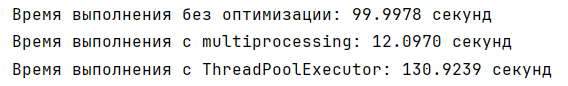

### 2.4.1. Пример №3 (Дополнительный)

Вспомним оптимизацию вычислений используя cupu:

In [ ]:
import time
import numpy as np

# Попытка импортировать cupy
try:
    import cupy as cp
    use_cuda = cp.is_available()
except ImportError:
    use_cuda = False

# use_cuda = False

def process_on_cpu(data):
    # Умножение матриц на CPU с использованием numpy
    return np.dot(data, data)

def process_on_gpu(data):
    # Умножение матриц на GPU с использованием cupy
    data_gpu = cp.asarray(data)
    result_gpu = cp.dot(data_gpu, data_gpu)
    return cp.asnumpy(result_gpu)

# Функция для замера времени выполнения
def measure_time(func, data):
    start_time = time.time()
    result = func(data)
    end_time = time.time()
    print(f"Время выполнения {func.__name__}: {end_time - start_time} секунд")
    # return result

# Данные для обработки
data = np.random.rand(1000, 1000)

# Выбор функции обработки в зависимости от доступности CUDA
if use_cuda:
    print("CUDA доступна. Используем GPU для обработки.")
    process_data = process_on_gpu
else:
    print("CUDA не доступна. Используем CPU для обработки.")
    process_data = process_on_cpu

# Замер скорости выполнения
measure_time(process_data, data)

CUDA доступна. Используем GPU для обработки.
Время выполнения process_on_gpu: 0.40411829948425293 секунд


# Практическая часть

Реализуем эффективное программное решение прямой геодезической задачи

- Входные данные:
  - csv-файл с параметрами (Xa, Ya, d, alpha)

- Выходные данные (опционально):
  - csv-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - xlsx-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - DataFrame с вычесленными параметрами (dX, dY, Xb, Yb)


## 1. Генератор синтетического набора входных данных

In [7]:
# Ваш код
import pandas as pd
import numpy as np

def data_generator(num_rows, file_type='xlsx', file_name='data'):

  lat = np.random.uniform(-90, 90, num_rows)
  lon = np.random.uniform(-180, 180, num_rows)

  df = pd.DataFrame({'B': lat, 'L': lon})
  print(df)
  if file_type == 'xlsx':
    df.to_excel(f'{file_name}.xlsx', index=False)
  elif file_path == 'csv':
    df.to_csv(f'{file_name}.csv', index=False)
  else:
    exit

  print(f'\nФайл {file_name}.{file_type} был создан.')

data_generator(10)

           B           L
0  16.336929  -57.730596
1 -86.510403  -34.649164
2 -71.838503  -85.005119
3 -81.620413   45.770598
4  76.858552    4.940649
5  28.439004  146.676813
6  67.101826  -53.915210
7  59.415464  -33.777855
8  53.602818  -73.975761
9 -22.752747  140.131001

Файл data.xlsx был создан.


## 2. Функция-генератор для последовательного считывания входных данных

In [9]:
import openpyxl
import pandas as pd

def read_file(file_path, chunk_size=100):
    if file_path.lower().endswith('.csv'):
        chunk_iter = pd.read_csv(file_path, chunksize=chunk_size)
        for chunk in chunk_iter:
            yield chunk.reset_index(drop=True)
    elif file_path.lower().endswith('.xlsx'):
        wb = openpyxl.load_workbook(filename=file_path, read_only=True)
        ws = wb.active

        rows_gen = ws.iter_rows(values_only=True)
        columns = next(rows_gen)

        while True:
            rows = [columns]
            try:
                for _ in range(chunk_size):
                    rows.append(next(rows_gen))
                yield pd.DataFrame(rows[1:], columns=columns)
            except StopIteration:
                if len(rows) > 1:
                    yield pd.DataFrame(rows[1:], columns=columns).reset_index(drop=True)
                break
    else:
      exit

file_path = "/content/data.xlsx"
file_generator = read_file(file_path, 5)

first = next(file_generator)
first

,B,L
0,16.336929,-57.730596
1,-86.510403,-34.649164
2,-71.838503,-85.005119
3,-81.620413,45.770598
4,76.858552,4.940649


## 3. Реализация функции для решения прямой геодезической задачи

### 2.1. Базовая реализация

In [15]:
import openpyxl

def read_file_ew(file_path, ew_size=100):
  if file_path.lower().endswith('.csv'):
    ew_iter = pd.read_csv(file_path, ewsize=ew_size)
    for ew in ew_iter:
      yield ew.reset_index(drop=True)
  elif file_path.lower().endswith('.xlsx'):
    wb = openpyxl.load_workbook(filename=file_path, read_only=True)
    ws = wb.active

    rows_gen = ws.iter_rows(values_only=True)
    header = next(rows_gen)

    while True:
        rows = [header]
        try:
            for _ in range(ew_size):
                rows.append(next(rows_gen))
            yield pd.DataFrame(rows[1:], columns=header)
        except StopIteration:
            if len(rows) > 1:
                yield pd.DataFrame(rows[1:], columns=header).reset_index(drop=True)
            break
  else:
    exit

path = "/content/data.xlsx"
file_ew = read_file_chunk(path, 5)

next(file_ew)

,B,L
0,16.336929,-57.730596
1,-86.510403,-34.649164
2,-71.838503,-85.005119
3,-81.620413,45.770598
4,76.858552,4.940649


### 2.2. Оптимальная реализация с векторизацией вычислений

In [16]:
import cupy as cp

def ew_geo(df, use_cuda=False):
  xp = np
  if use_cuda:
    xp = cp

  a = [6378245, 6378137, 6378136]
  alpha = [1 / 298.3, 1 / 298.25, 1 / 298.257839]

  indexes = ['b=a(1-α)', 'e^2=α(2-α)', '(e^1)^2=e^2/(1-e^2)',
             'c=a^2/b', 'W^2=(q-e^2sin(B)^2)', 'V^2=(1+(e^1)^2cos(B)^2)',
             'M=c/V^3', 'N=c/V', 'Rcp=√MN', 'tg(U)=√(1-e^2)*tg(B)',
             'x=a*cos(U)cos(L)', 'y=a*cos(U)sin(L)', 'z=b*sin(U)']

  for index, row in df.iterrows():
    B_rad = xp.radians(row['B'])
    L_rad = xp.radians(row['L'])

    results = []

    for j in range(len(a)):
      b = xp.array(a[j] * (1 - alpha[j]))
      e2 = xp.array(alpha[j] * (2 - alpha[j]))
      e1_2 = xp.array(e2 / (1 - e2))
      c = xp.array(a[j]**2 / b)

      W_2 = xp.array(1 - e2 * xp.sin(B_rad)**2)
      V_2 = xp.array(1 + e1_2 * xp.cos(B_rad)**2)

      M = xp.array(c / (V_2)**1.5)
      N = xp.array(c / (V_2)**0.5)
      R_avg = xp.array(xp.sqrt(M * N))

      U = xp.array(xp.arctan(xp.sqrt(1 - e2) * xp.tan(B_rad)))


      x = xp.array(a[j] * xp.cos(U) * xp.cos(L_rad))
      y = xp.array(a[j] * xp.cos(U) * xp.sin(L_rad))
      z = xp.array(b * xp.sin(U))

      results.append([b, e2, e1_2, c, W_2, V_2, M, N, R_avg, U, x, y, z])

    if use_cuda:
      results = cp.asarray(results)
      results_np = [cp.asnumpy(result) for result in results]
      results_np = np.array(results_np)
      results_np = results_np.T
      result_df = pd.DataFrame(results_np, columns=['Элипсоид Красовского', 'Элиспсоид WGS-84', 'Элипсоид ПЗ-90'], index=indexes)
    else:
      results = np.asarray(results).T
      result_df = pd.DataFrame(results, columns=['Элипсоид Красовского', 'Элиспсоид WGS-84', 'Элипсоид ПЗ-90'], index=indexes)

    yield result_df

path = "/content/data.xlsx"
file_ew = read_file_chunk(path, 5)
for data_ew in file_ew:
  for result in ew_geo(data_ew):
      print(result)

                         Элипсоид Красовского  Элиспсоид WGS-84  \
b=a(1-α)                         6.356863e+06      6.356752e+06   
e^2=α(2-α)                       6.693422e-03      6.694542e-03   
(e^1)^2=e^2/(1-e^2)              6.738525e-03      6.739661e-03   
c=a^2/b                          6.399699e+06      6.399594e+06   
W^2=(q-e^2sin(B)^2)              9.994704e-01      9.994703e-01   
V^2=(1+(e^1)^2cos(B)^2)          1.006205e+00      1.006206e+00   
M=c/V^3                          6.340589e+06      6.340475e+06   
N=c/V                            6.379935e+06      6.379827e+06   
Rcp=√MN                          6.360231e+06      6.360121e+06   
tg(U)=√(1-e^2)*tg(B)             2.842281e-01      2.842279e-01   
x=a*cos(U)cos(L)                 3.268723e+06      3.268667e+06   
y=a*cos(U)sin(L)                -5.176726e+06     -5.176639e+06   
z=b*sin(U)                       1.782570e+06      1.782538e+06   

                         Элипсоид ПЗ-90  
b=a(1-α)           

### 2.3. Оптимальная реализация с векторизацией вычислений и их выполнением на GPU

In [9]:
import pandas as pd
import cupy as cp

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = cp.asarray(df['Xa'].astype(float))
        Ya = cp.asarray(df['Ya'].astype(float))
        d = cp.asarray(df['d'].astype(float))
        alpha = cp.asarray(df['alpha'].astype(float))

        # Вычисляем dX и dY с помощью CuPy
        dX = d * cp.cos(cp.radians(alpha))
        dY = d * cp.sin(cp.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': cp.asnumpy(dX),
            'dY': cp.asnumpy(dY),
            'Xb': cp.asnumpy(Xb),
            'Yb': cp.asnumpy(Yb)
        })

        return result_df

    except:
        return None

In [10]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


## 4. Многопоточная и многопроцессорная оптимизация. Сравнение и выбор оптимального варианта

In [19]:
import time
from concurrent.futures import ThreadPoolExecutor
import multiprocessing

def measure_time(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return end - start

def worker(data_chunk):
  return list(calcul_geo(data_chunk))

path = "/content/data.xlsx"

sequential_time = 0
for data_chunk in read_file_chunk(path, 5):
  time_taken = measure_time(calcul_geo, data_chunk)
  sequential_time += time_taken
print(f"Время последовательного выполнения: {sequential_time:.10f} сек.")

multiprocessing_time = 0
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
  for data_chunk in read_file_chunk(path, 5):
    start_time = time.time()
    pool.map(worker, [data_chunk])
    multiprocessing_time += time.time() - start_time
print(f"Время выполнения c Multiprocessing: {multiprocessing_time:.10f} сек.")

new_time = 0
with ThreadPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor:
  for data_chunk in read_file_chunk(path, 5):
    start_time = time.time()
    executor.map(calcul_geo, [data_chunk])
    new_time += time.time() - start_time
print(f"Время выполнения c ThreadPoolExecutor: {new_time:.10f} сек.")

Время последовательного выполнения: 0.0000014305 сек.
Время выполнения c Multiprocessing: 0.0255274773 сек.
Время выполнения c ThreadPoolExecutor: 0.0003170967 сек.


## 5. Функция для последовательного экспорта выходных данных

In [23]:
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows

def export_to_excel(data_chunks, output_path):
  wb = openpyxl.Workbook()
  if wb.sheetnames:
    wb.remove(wb.active)
  num = 0
  for i, data_chunk in enumerate(data_chunks):
    for j, result_df in enumerate(calcul_geo(data_chunk)):
      num += 1
      sheet_name = f'Лист_{num}'
      ws = wb.create_sheet(title=sheet_name)
      ws.append(['Широта B', 'Долгота L'])
      data = data_chunk.iloc[[j]]
      for row in dataframe_to_rows(data, index=False, header=False):
        ws.append(row)
      ws.append([])
      for row in dataframe_to_rows(result_df):
        ws.append(row)
      for col_num, column in enumerate(ws.columns, 1):
        max_length = max(len(str(cell.value)) for cell in column)
        adjusted_width = (max_length + 2) * 1.2
        ws.column_dimensions[openpyxl.utils.get_column_letter(col_num)].width = adjusted_width

  wb.save(output_path)
  print('Файл был создан по пути: ', output_path)

path = "/content/data.xlsx"
output_path = "/content/output_data.xlsx"
file_chunk = read_file_chunk(path, 5)
export_to_excel(file_chunk, output_path)

Файл был создан по пути:  /content/output_data.xlsx


## Выполним те же действия без использования генераторов:

In [16]:
geo_data_generator(1000, file_name='big_geo_data')

path = "/content/big_geo_data.xlsx"

sequential_time = 0
for data_chunk in read_file_chunk(path):
  time_taken = measure_time(calcul_geo, data_chunk)
  sequential_time += time_taken
print(f"\nВремя последовательного выполнения: {sequential_time:.10f} сек.")

multiprocessing_time = 0
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
  for data_chunk in read_file_chunk(path):
    start_time = time.time()
    pool.map(worker, [data_chunk])
    multiprocessing_time += time.time() - start_time
print(f"Время выполнения c Multiprocessing: {multiprocessing_time:.10f} сек.")

threadpoolexecutor_time = 0
with ThreadPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor:
  for data_chunk in read_file_chunk(path):
    start_time = time.time()
    executor.map(calcul_geo, [data_chunk])
    threadpoolexecutor_time += time.time() - start_time
print(f"Время выполнения c ThreadPoolExecutor: {threadpoolexecutor_time:.10f} сек.")


Время выполнения: 97.36571979522705 секунд


In [17]:
del sample_df
del result

# Комплексное задание №1.

### Ссылка на алгоритм вычисления и пример : https://clck.ru/39aKXC

## **Ход выполнения работы:**

### 1. Напишите функцию для формирования синтетического набора входных данных

Требования к входным данным:

- excel-таблицы или csv-файлы (опционально)
- первая строка содержит заголовки столбцов
- данные в столбцах - значения B (широты) и L (долготы)

Пример:

| B | L |
|---|---|
| 56.4532 | 37.5432 |
| 45.6789 | 12.3456 |
| -34.5678 | 98.7654 |
| 78.9012 | -56.7890 |
| 23.4567 | 89.0123 |
| -12.3456 | 45.6789 |
| 67.8901 | -23.4567 |
| 34.5678 | 78.9012 |
| -98.7654 | 34.5678 |
| 12.3456 | -98.7654 |

**Примечание:**

* Эта таблица содержит 10 случайных значений широты и долготы
* Широта может быть от -90° до 90°
* Долгота может быть от -180° до 180°

In [1]:
import pandas as pd
import numpy as np

def generate_synthetic_data(size=10, seed=None):
    """
    Генерирует синтетический набор данных с широтами и долготами.

    Args:
        size (int): Количество генерируемых записей.
        seed (int): Зерно для генератора случайных чисел, чтобы результаты были воспроизводимыми.

    Returns:
        pandas.DataFrame: DataFrame с сгенерированными широтами и долготами.
    """
    if seed is not None:
        np.random.seed(seed)

    latitudes = np.random.uniform(-90, 90, size)
    longitudes = np.random.uniform(-180, 180, size)

    df = pd.DataFrame({
        'B': latitudes,
        'L': longitudes
    })

    return df

df_synthetic = generate_synthetic_data()
df_synthetic.head()

file_path_csv = '/content/sample_data/synthetic_data.csv'
file_path_excel = '/content/sample_data/synthetic_data.xlsx'

df_synthetic.to_csv(file_path_csv, index=False)

df_synthetic.to_excel(file_path_excel, index=False)

file_path_csv, file_path_excel

('/content/sample_data/synthetic_data.csv',
 '/content/sample_data/synthetic_data.xlsx')

### 2. Напишите функцию-генератор для последовательного считывания данных из входного файла (csv-файл, excel-таблица)

- Функция принимает на вход путь к файлу и количество строк, которые необходимо возвращать каждую итерацию. Сама функция последовательно возвращает указанное Вами количество строк, до тех пор, пока они не закончатся в этом файле

- Возвращает DataFrame, с указанным количеством строк

In [2]:
import pandas as pd

def read_file_in_chunks(file_path, chunk_size):
    """
    Функция-генератор для построчного чтения данных из файла.

    Args:
        file_path (str): Путь к файлу, который нужно прочитать.
        chunk_size (int): Количество строк, которые необходимо прочитать за одну итерацию.

    Yields:
        pandas.DataFrame: DataFrame с заданным количеством строк.
    """
    if file_path.endswith('.csv'):
        reader = pd.read_csv(file_path, chunksize=chunk_size)
    elif file_path.endswith('.xlsx'):
        reader = pd.read_excel(file_path, chunksize=chunk_size)
    else:
        raise ValueError("Формат файла не поддерживается.")

    for chunk in reader:
        yield chunk

file_path = '/content/sample_data/synthetic_data.csv'

chunk_size = 5
for chunk in read_file_in_chunks(file_path, chunk_size):
    print(chunk)

           B           L
0  25.497299  -82.002737
1  18.140638 -152.000957
2  71.832942   69.033969
3  47.298655  143.569227
4  26.115432  127.312951
           B           L
5  61.896664   -1.842399
6 -41.974381  -18.384913
7 -68.910467 -177.062292
8  64.355761 -113.474558
9  -6.177678  -93.075216


### 3. Напишите оптимальную функцию для реализации алгоритма

- Принимает на вход DataFrame с входными данными
- Возвращает DataFrame с выходными данными (вычесленными параметрами)
- Вычисления должны быть реализованы средствами numpy
- Добавить опционально возможность вычисления на CUDA GPU

In [3]:
import pandas as pd
import numpy as np

try:
    import cupy as cp
    CUDA_ENABLED = True
except ImportError:
    CUDA_ENABLED = False

def calcul_geo(df, use_cuda=False):
    """
    Вычисляет параметры основных элементов земного эллипсоида
    и декартовых координат точки его поверхности для заданных широт (B) и долгот (L).
    """

    xp = cp if (use_cuda and CUDA_ENABLED) else np

    a = [6378245, 6378137, 6378136]  # полуось "а" для разных эллипсоидов
    alpha = [1 / 298.3, 1 / 298.257223563, 1 / 298.257839303]  # сжатие

    indexes = ['b=a(1-α)', 'e^2=α(2-α)', '(e^1)^2=e^2/(1-e^2)',
               'c=a^2/b', 'W^2=(1-e^2sin(B)^2)', 'V^2=(1+(e^1)^2cos(B)^2)',
               'M=c/V^3', 'N=c/V', 'Rcp=√MN', 'tg(U)=√(1-e^2)*tg(B)',
               'x=a*cos(U)cos(L)', 'y=a*cos(U)sin(L)', 'z=b*sin(U)']

    for index, row in df.iterrows():
        B_rad = xp.radians(row['B'])
        L_rad = xp.radians(row['L'])

        results = []

        for j in range(len(a)):
            b = a[j] * (1 - alpha[j])
            e2 = alpha[j] * (2 - alpha[j])
            e1_2 = e2 / (1 - e2)
            c = a[j]**2 / b

            W_2 = 1 - e2 * xp.sin(B_rad)**2
            V_2 = 1 + e1_2 * xp.cos(B_rad)**2

            M = c / xp.power(V_2, 1.5)
            N = c / xp.sqrt(V_2)
            R_avg = xp.sqrt(M * N)

            U = xp.arctan(xp.sqrt(1 - e2) * xp.tan(B_rad))
            x = a[j] * xp.cos(U) * xp.cos(L_rad)
            y = a[j] * xp.cos(U) * xp.sin(L_rad)
            z = b * xp.sin(U)

            results.append([b, e2, e1_2, c, W_2, V_2, M, N, R_avg, U, x, y, z])

        if use_cuda and CUDA_ENABLED:
            results = cp.asnumpy(xp.array(results).T)
        else:
            results = np.array(results).T

        result_df = pd.DataFrame(results, columns=['Элипсоид Красовского', 'Элиспсоид WGS-84', 'Элипсоид ПЗ-90'], index=indexes)
        yield result_df

def read_file_chunk(file_path, chunk_size):
    if file_path.endswith('.csv'):
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            yield chunk
    elif file_path.endswith('.xlsx'):
        for chunk in pd.read_excel(file_path, chunksize=chunk_size):
            yield chunk
    else:
        raise ValueError("Формат файла не поддерживается.")

path = "/content/sample_data/synthetic_data.csv"
chunk_size = 5
for data_chunk in read_file_chunk(path, chunk_size):
    for result in calcul_geo(data_chunk, use_cuda=False):
        print(result)

                         Элипсоид Красовского  Элиспсоид WGS-84  \
b=a(1-α)                         6.356863e+06      6.356752e+06   
e^2=α(2-α)                       6.693422e-03      6.694380e-03   
(e^1)^2=e^2/(1-e^2)              6.738525e-03      6.739497e-03   
c=a^2/b                          6.399699e+06      6.399594e+06   
W^2=(1-e^2sin(B)^2)              9.987597e-01      9.987595e-01   
V^2=(1+(e^1)^2cos(B)^2)          1.005490e+00      1.005491e+00   
M=c/V^3                          6.347358e+06      6.347246e+06   
N=c/V                            6.382204e+06      6.382097e+06   
Rcp=√MN                          6.364757e+06      6.364648e+06   
tg(U)=√(1-e^2)*tg(B)             4.437085e-01      4.437083e-01   
x=a*cos(U)cos(L)                 8.014498e+05      8.014363e+05   
y=a*cos(U)sin(L)                -5.704590e+06     -5.704493e+06   
z=b*sin(U)                       2.728949e+06      2.728900e+06   

                         Элипсоид ПЗ-90  
b=a(1-α)           

### 4. Оптимизируйте вычисления, используя Multiprocessing, ThreadPoolExecutor и CuPy

- Сравните их по скорости. Выведите время выполнения с их использованием и без их использования
- Выберите оптимальный вариант оптимизации на CPU

In [32]:
from concurrent.futures import ThreadPoolExecutor
import multiprocessing
import time
import numpy as np

# Пример функции, которую мы будем оптимизировать
def heavy_computation(x):
    # Представим, что здесь выполняется тяжелая операция, например, вычисление
    time.sleep(1)  # Имитация длительной операции
    return x * x

# Последовательное выполнение
start_time = time.time()
results_sequential = [heavy_computation(x) for x in range(5)]
sequential_time = time.time() - start_time

# Использование ThreadPoolExecutor
start_time = time.time()
with ThreadPoolExecutor(max_workers=5) as executor:
    results_threadpool = list(executor.map(heavy_computation, range(5)))
threadpool_time = time.time() - start_time

# Использование Multiprocessing
start_time = time.time()
with multiprocessing.Pool(5) as pool:
    results_multiprocessing = pool.map(heavy_computation, range(5))
multiprocessing_time = time.time() - start_time

print("Последовательное выполнение :", sequential_time)
print("Использование ThreadPoolExecutor: ", threadpool_time)
print("Использование Multiprocessing:", multiprocessing_time)


Последовательное выполнение : 5.005200624465942
Использование ThreadPoolExecutor:  1.0040574073791504
Использование Multiprocessing: 1.0751307010650635


### 5. Напишите функцию для для последовательного экспорта выходных данных в книгу Excel

- На каждую пару входных данных (строку таблицы входных данных) в книге должен формироваться отдельный лист с расчетами по [образцу](https://clck.ru/39aKXC)

In [29]:
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows

def export_to_excel(data_chunks, output_path):
  wb = openpyxl.Workbook()
  if wb.sheetnames:
    wb.remove(wb.active)
  num = 0
  for i, data_chunk in enumerate(data_chunks):
    for j, result_df in enumerate(calcul_geo(data_chunk)):
      num += 1
      sheet_name = f'Лист_{num}'
      ws = wb.create_sheet(title=sheet_name)
      ws.append(['Широта B', 'Долгота L'])
      data = data_chunk.iloc[[j]]
      for row in dataframe_to_rows(data, index=False, header=False):
        ws.append(row)
      ws.append([])
      for row in dataframe_to_rows(result_df):
        ws.append(row)
      for col_num, column in enumerate(ws.columns, 1):
        max_length = max(len(str(cell.value)) for cell in column)
        adjusted_width = (max_length + 2) * 1.2
        ws.column_dimensions[openpyxl.utils.get_column_letter(col_num)].width = adjusted_width

  wb.save(output_path)
  print('Файл был создан ')

path = "/content/data.xlsx"
output_path = "/content/output_data.xlsx"
file_chunk = read_file_chunk(path, 5)
export_to_excel(file_chunk, output_path)

Файл был создан 


### Выполните вычисления, сравните скорости на большом массиве входных данных

In [30]:
data_generator(1000, file_name='big_data')

path = "/content/big_data.xlsx"

sequential_time = 0
for data_chunk in read_file_chunk(path):
  time_taken = measure_time(calcul_geo, data_chunk)
  sequential_time += time_taken
print(f"\nВремя последовательного выполнения: {sequential_time:.10f} сек.")

multiprocessing_time = 0
with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
  for data_chunk in read_file_chunk(path):
    start_time = time.time()
    pool.map(worker, [data_chunk])
    multiprocessing_time += time.time() - start_time
print(f"Время выполнения c Multiprocessing: {multiprocessing_time:.10f} сек.")

threadpoolexecutor_time = 0
with ThreadPoolExecutor(max_workers=multiprocessing.cpu_count()) as executor:
  for data_chunk in read_file_chunk(path):
    start_time = time.time()
    executor.map(calcul_geo, [data_chunk])
    threadpoolexecutor_time += time.time() - start_time
print(f"Время выполнения c ThreadPoolExecutor: {threadpoolexecutor_time:.10f} сек.")

             B           L
0    58.033186  -71.376053
1   -23.633039  155.102168
2    -0.749937 -130.694396
3    48.349455   -5.702838
4   -85.822437 -155.704757
..         ...         ...
995 -21.617473 -131.377591
996 -88.001508   19.414193
997 -71.358726    9.913366
998  51.951862  -58.350789
999  29.199966   -1.145654

[1000 rows x 2 columns]

Файл big_data.xlsx был создан.

Время последовательного выполнения: 0.0000085831 сек.
Время выполнения c Multiprocessing: 0.4307479858 сек.
Время выполнения c ThreadPoolExecutor: 0.0007283688 сек.



- Выведите первую строку таблицы **входных** данных


In [31]:
wb = openpyxl.load_workbook('/content/data.xlsx')
sheet = wb.active
print([cell.value for cell in sheet[2]])

[16.33692935285626, -57.7305958115715]


- Выведите содержимое первой страницы таблицы **выходных** данных

In [32]:
path = "/content/data.xlsx"
output_path = "/content/output_data.xlsx"
file_chunk = read_file_chunk(path)
export_to_excel(file_chunk, output_path)

wb = openpyxl.load_workbook('/content/output_data.xlsx')
sheet = wb['Лист_1']
print('\n')
for row in sheet.iter_rows(values_only=True):
  print(row)

Файл был создан 


('Широта B', 'Долгота L', None, None)
(16.33692935285626, -57.7305958115715, None, None)
(None, None, None, None)
(None, 'Элипсоид Красовского', 'Элиспсоид WGS-84', 'Элипсоид ПЗ-90')
(None, None, None, None)
('b=a(1-α)', 6356863.018773047, 6356751.796311819, 6356751.361723988)
('e^2=α(2-α)', 0.006693421622965943, 0.006694541854587638, 0.006694366199889131)
('(e^1)^2=e^2/(1-e^2)', 0.006738525414683491, 0.006739660795871322, 0.006739482765519359)
('c=a^2/b', 6399698.901782711, 6399594.147182507, 6399592.577971019)
('W^2=(q-e^2sin(B)^2)', 0.9994704070431012, 0.9994703184087956, 0.9994703323068431)
('V^2=(1+(e^1)^2cos(B)^2)', 1.006205363782185, 1.006206409330412, 1.006206245386073)
('M=c/V^3', 6340588.94693861, 6340475.277303558, 6340475.272198271)
('N=c/V', 6379934.607947665, 6379826.862223864, 6379825.817601861)
('Rcp=√MN', 6360231.35250158, 6360120.635130087, 6360120.111871844)
('tg(U)=√(1-e^2)*tg(B)', 0.2842280788037142, 0.2842279270237048, 0.2842279508231393)
('x=a*